# Statistical Learning
## Accuracy and Prediction

## BMIG 62003
## Horacio Gomez-Acevedo
## UAMS

Some of the figures and material in this presentation are taken from <cite id="2cs47">(Gareth, James et al., 2015)</cite> with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani

Let's suppose we observe a quatitative response $Y$ and $p$ different predictors $X_1,\ldots, X_p$, which can be written in the form
\begin{equation*}
Y= f(X) + \varepsilon
\end{equation*}
We assume that the function $f$ is **fixed but unknown**, and $\varepsilon$ is a **random error term**, which is independent of $X$ and has mean zero (i.e. its expected value $E (\varepsilon) =0$).

**Statistical Learning** refers to a set of approaches for estimating $f$, for the purpose of either predict future responses or make inferences about inner relationships within the model predictors. 


### Prediction

Let's suppose that a set of input (predictors) is readily available, but for some financial or practical constrains we cannot estimate the output $Y$. We can predict $Y$ using
\begin{equation*}
\hat{Y} = \hat{f}(X),
\end{equation*}
where $\hat{f}$ represents an estimate for $f$ and $\hat{Y}$ respresent the resulting prediction for $Y$.

> Note that this is a very general setting, for instance in (multi)linear regression, we cannot make predictions outside certain regions.

#### How accurate is $\hat{Y}$?

The accuracy of $\hat{Y}$ as a prediction for $Y$ depends on two quatitites
+ reducible error
+ irreducible error

The reducible error reflects the leverage that modeler has to pick a *better* statistical technique for estimation. Even in the case when we have a perfect estimate of $f$ (i.e.  $\hat{Y}=f(X)$), we will have 
\begin{equation*}
|\hat{Y}-Y| = \varepsilon
\end{equation*}
since $\varepsilon$ does not depend on $X$. Thus, we cannot reduce the error introduced by $\varepsilon$ no matter how well our estimates are.

Recall that if you have a random variable $Z$ (with $E(|Z|)<\infty$ and $\mathrm{Var}(Z)<\infty$), the following relationships hold 

$$E(Z^2)= \mathrm{Var}(Z) + (E(Z))^2$$
and 
$$\mathrm{Var}(aZ+b)= a^2\mathrm{Var}(Z)$$ 

Now if we consider for a moment that both $\hat{f}$ and $X$ are fixed ($f$ was already fix but unknown), we have that the average (expected value) of the squared difference is 

\begin{equation}
\begin{split}
E(Y-\hat{Y})^2&= E(f(X)+ \varepsilon -\hat{f}(X))^2= \mathrm{Var}(f(X)-\hat{f}(X)+ \varepsilon ) + \left(E(f(X)-\hat{f}(X)+\varepsilon) \right)^2 \\
&= \mathrm{Var}(\varepsilon) + \mathrm{Var}(f(X)-\hat{f}(X))+ \left( E(f(X)-\hat{f}(X)) + E(\varepsilon) \right)^2\\
&= \color{red}{\mathrm{Var}(\varepsilon)}+\color{blue}{E\left( f(X)-\hat{f}(X)\right)^2} 
\end{split}
\end{equation}
The reducible error is colored in blue and the irreducible error is in red.

Thus, the accuracy will be (lower) bounded by $\mathrm{Var}(\varepsilon)$, but this bound is almost never known in practice. 


### Inference 

In this case we are mainly interested in determined the way that $Y$ is affected by changing $X_1,\ldots,X_p$. This means trying to understand the relationship between the output and the predictors. For instance we try to answer questions like

+ Which predictors are more important?
+ What relationship exist between the response and each of the predictors?
+ Is the relationship between $Y$ and predictor $X_i$ linear, or should it be nonlinear?


## Estimation of $f$

The observations at hand are called **training data**, because we will use those observations to find an estimate $\hat{f}$. Let $x_{ij}$ represents the value of the predictor $j$ for the $i$th observation ($i\in \{1,\ldots,n\}, j\in \{1,\ldots,p\}$, and the response variable $y_i$ for the $i$th observation. Our dataset looks something like this

\begin{equation}
\left\{
\left(
\left( 
\begin{matrix}
x_{11}\\
x_{12}\\
\vdots \\
x_{1p}
\end{matrix}\right),
y_1 \right), 
\left(
\left( 
\begin{matrix}
x_{21}\\
x_{22}\\
\vdots \\
x_{2p}
\end{matrix}\right),
y_2 \right),
\ldots,
\left(
\left( 
\begin{matrix}
x_{n1}\\
x_{n2}\\
\vdots \\
x_{np}
\end{matrix}\right),
y_n
\right)
\right\}
\end{equation}

 

#### Example. 

We will consider the dataset *income2.csv* that consists of $n=30$ datapoints about seniority, income and level of education. We will apply a statistical learning method to find a function $\hat{f}$ that approximates that approximates $Y$ (i.e., $Y \sim f(\hat{X})$ for any observation $(X,Y)$).

##### Parametric Method

Parametric methods are those methods in which we need to find certain parameters for the estimation of $f$.

+ We need to select the functional form of $f$. 

Traditionally, we apply the condition that $f$ is linear

\begin{equation}
f(X) = \beta_0+ \beta_1 X_1 + \cdots+ \beta_p X_p
\end{equation}

+ We need to use a procedure that uses the training data to **fit** or **train** the model

In the previous setup, this would mean to find values for the parameters $\beta_0, \beta_1,\ldots,\beta_p$ such that
\begin{equation*}
Y \sim \beta_0+ \beta_1 X_1 + \cdots+ \beta_p X_p
\end{equation*}

One procedure that can be used is **(ordinary) least squares**.

Going back to our example, if $X_1$ represents *seniority* and $X_2$ *years of education* and $Y$ the *annual income*, let's assume for a moment that we know the exact function $f$ (the graph (surface) of $f$ depicted in blue, and the red dots represent each of the observations from our dataset)

<img src='../../Figures/2.3.png'>

If we apply (ordinary) least squares, we have to fit a linear model of the form
\begin{equation*}
\mathrm{income} \approx \beta_0 + \beta_1 \times\mathrm{education} + \beta_2 \times \mathrm{seniority}  
\end{equation*}

And the linear model fit look like

<img src='../../Figures/2.4.png'>


Note that $\hat{f}$ does not match the unknown function $f$, and we may think is other models that *look more like* $f$ by adding certain complexity (e.g., adding quadratic terms). More complex models tend to **overfit** the data (i.e., they follow too close the errors and performed poorly when predicting unseen data).



#### Non-parametric methods

These methods do not make the assumption about the form of the function $f$. Instead they look for an estimate of $f$ that gets as close to the points as possible without given (hyper)surfaces that are too rough or wiggly. 

One of this methodologies for instance is the *thin plate splines* that tries to adjust a surface so that *bending energy* of the points is optimized. 

<img src='../../Figures/2.6.png'>

Two methodologies that are worth mentioning for non-parametric test are 

+ *loess* (local regression) where a parameter determines the size of the window in which the local regression will be applied.
+ *restricted cubic splines* in which the knots of the spline are driven by the data itself. 


### Model interpretability or prediction accuracy

Whereas models with larger number of parameters tend to improve accuracy it comes at the expense of model interpretability. 


## Model Accuracy

First, there is not a single statistical method that can be accurate under all the circumstances. 

One way to check accuracy is by measuring the **quality of fit**, which means to determine how well the predictions match the observed data. 

In (multi)linear regression, one commonly-used measure is the **MEAN SQUARED ERROR (MSE)**

\begin{equation}
\mathrm{MSE}= \frac{1}{n}\sum_{i=1}^n (y_i -\hat{f}(x_i))^2 = \frac{1}{n} \sum_{i=1}^n e_i^2,
%\label{eq:mse}
\end{equation}
where $e_i$ are called the residuals.

> Note. MSE formula sometimes changes shape (mostly the denominator)

For instance, in an Analysis of Variance with $p$ levels with $n$ samples each the MSE is expressed as

\begin{equation}
\mathrm{MSE}= \frac{1}{p(n-1)} \sum_{i,j}(X_{ij}-\mu_i)^2
\end{equation}



Also, in the case of the linear regression with one predictor variable $Y=\beta_0+ \beta_1 X + \varepsilon$, where $\mathrm{Var}(\varepsilon)=\sigma^2$, we have that $\frac{1}{n-2} \sum_{i=1}^n e_i^2$ is an unbiassed estimator of $\sigma^2$. 

### Training and test MSE

We will refer to the MSE obtained from the observations as the **training MSE**. Thus, if we have our *training observations* $\{ (x_1,y_1),\ldots,(x_n,y_n) \}$, we obtain the estimate $\hat{f}$ by using say multlinear regression. Then, the training MSE is suppose to be small for $\hat{f}$, but can still use another more sophisticated model and get smaller MSE (say by restricted cubic splines).

However, if we would prefer to know *how well the model perfoms for a set of previously unseen observations* we need to quantify the **test MSE**. Let's suppose that we have *new* observations $\{ (\tilde{x_1},\tilde{y_1}),\ldots,(\tilde{x_m},\tilde{y_m})\}$, then we would like to select the method that minimizes equation \ref{eq:mse} when applied for our new set of observations. 

If we consider a plot comparing the MSE with model flexibility (technically called *degrees of freedom*), we observe two fundamental properties

+ test MSE has a U-shape 
+ training MSE is monotonically decreases as the model complexity increases. 

The simulated data from $f$ and three estimates are given (red linear regression and blue and green smoothing splines). The training MSE is shown in gray, and test MSE in red. The squares represent the values for each of those estimates. 
<img src="../../Figures/2.9.png">

In practice, an estimation of test MSE is much more difficult, but there are approaches that can be used to determine (namely, **cross-validation**). 


## Bias-Variance trade-off

Let's suppose we have a given value $x_0$, then the expected value of the test MSE can be decomposed into:

+ variance of $\hat{f}(x_0)$,
+ squared bias of $\hat{f}(x_0)$,
+ variance of the error terms $\varepsilon$.

Recall that the **bias** of the estimator $\hat{\Theta}$ of the random variable $\Theta$ is defined as

\begin{equation}
\mathrm{Bias}(\hat{\Theta})= E(\hat{\Theta}) - \Theta 
\end{equation}

The estimator $\hat{\Theta}$ is called unbiassed when $\mathrm{Bias}(\hat{\Theta})=0$. 

In mathematical terms, test MSE is defined as an average (expected value) of square differences between the new values and their estimates, that is
$E[(y_0-\hat{f}(x_0))^2]$. 

Note that $f$ is *fixed* and theoretically known, so even when we have a new dataset $(x_0,y_0)$, their values are known without any error, thus $E(f(x_0))=f(x_0)$ and $\mathrm{Var}(f(x_0))=0$.  

\begin{equation}
\label{eq:bias-variance}
\begin{split}
E\left[ (y_0- \hat{f}(x_0))^2 \right] &= E[ (f(x_0)+ \varepsilon - \hat{f}(x_0))^2 ]\\
&= \mathrm{Var}(f(x_0) + \varepsilon - \hat{f}(x_0)) + \left[ E(f(x_0)+\varepsilon -\hat{f}(x_0))\right]^2 \\
&= \mathrm{Var}(f(x_0))+ \mathrm{Var}(\hat{f}(x_0)) + \mathrm{Var}(\varepsilon) + 
\left[ E(f(x_0)-\hat{f}(x_0))+ E(\varepsilon)\right]^2\\
&= \mathrm{Var}(\hat{f}(x_0)) +\mathrm{Var}(\varepsilon) + \left[ E(f(x_0)-\hat{f}(x_0))\right]^2\\
&= \mathrm{Var}(\hat{f}(x_0)) +\mathrm{Var}(\varepsilon) + \left[ f(x_0) - E(\hat{f}(x_0))\right]^2\\
&= \mathrm{Var}(\hat{f}(x_0)) +\mathrm{Var}(\varepsilon) + \left[\mathrm{Bias}(\hat{f}(x_0)) \right]^2
\end{split}
\end{equation}

What does it mean?

The *variance* refers to the amount by which $\hat{f}$ would change if we estimated it using a different training set. Intuitively, if our model is simple (say linear regression) changing our training dataset won't change the line that much, but if we have a model that follows closely the training set, replacing a point will increase the variance significantly.

On the other hand, *bias* refers to the error that is introduced by approximating a real-life problem (say highly non-linear) with a simpler model say a linear one. 



Automatically created module for IPython interactive environment


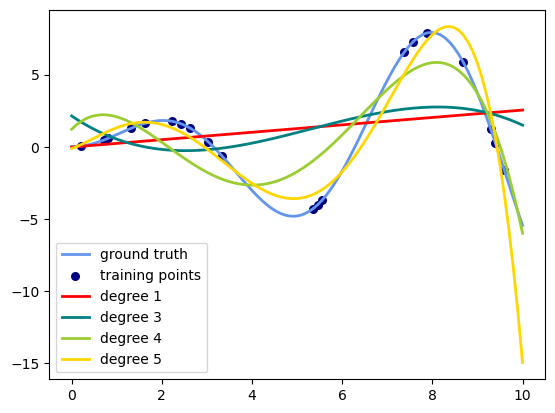

In [1]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['red','teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([1,3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

Note that the number of parameters to be estimated increases
+ For degree 1, $f(x)=a_1x+a_0$
+ For degree 2, $f(x)= a_2x^2+a_1x+a_0$, etc.

## Classification 

When we have *categorical responses* (e.g., "high", "low","medium") the our prediction problem become a **classification problem**. Let's suppose that we are looking for a estimate $f$ basis of the *training* observations $\{ (x_1,y_1), \ldots, (x_n,y_n)\}$ where $y_i$ is a member of one given class $C_k$ ($k\in \{1,\ldots,r\}$. 

One common approach to quantify the quality of the estimate $\hat{f}$ is the **training error rate**, that is the proportion of classification errors that we incurred during if we apply our estimate $\hat{f}$.

\begin{equation}
\frac{1}{n} \sum_{i=1}^n I_{y_i \ne \hat{y}_i}
\end{equation}

where $\hat{y}_i$ is our prediction for the observation $i$ by the estimate $\hat{f}$, and $I_{y_i \ne \hat{y}_i}$ is the *indicator function* which is equal to 1 if the condition is true (i.e. $y_i \ne \hat{y}_i$) and zero elsewhere. Thus the expression on the right is measuring the fraction of incorrect classifications.

As we did before, we can define the **test error rate** associated with a set of previously unseen observations $(x_0,y_0)$ as

\begin{equation}
\mathrm{Average}(I_{y_0 \ne \hat{y}_0}) 
\label{eq:classtesterror}
\end{equation}


### Bayes classifier

The test error rate given in (\ref{eq:classtesterror}) can be minimized (on average) by a simple classifier that assigns *each observation the most likely class, given its predictor values*). 
So, for the test observation with predictor vector $x_0$ will belong to the class $j$ for which

\begin{equation*}
\mathrm{Pr}(Y=j | X=x_0)
\end{equation*}

is largest. This classifier is refered to as **Bayes classifier**.

The Bayes classifier produces the lowest possible test error rate, calles the **Bayes error rate**. In general the overall Bayes error rate is given by

\begin{equation*}
1 - E \left( \max_{j} \mathrm{Pr}(Y=j|X) \right)
\end{equation*}

### K-Nearest Neighbors

One of the problems with the Bayes classifier is that we normally don't know the conditional distribution $Y$ given $X$. Thus, it becomes a *theoretical gold standard* which is unattainable.

$K$-nearest neighbors (KNN) in which given a positive integer $K$ and a test observation $x_0$, the *KNN* classifier first identifies the $K$ points in the trianing data that are the closests to $x_0$, represented by $\cal{N}_0$. It then estimates the conditional probability for class $j$ as the fraction of points in $\cal{N}_0$ whose response values equal $j$:

\begin{equation*}
\mathrm{Pr}(Y=j | X=x_0) = \frac{1}{K} \sum_{i \in {\cal N}_0} I_{y_i=j}
\end{equation*}

Finally, KNN aplies Bayes rule and classifies the test observation to $x_0$ to the class with the largest probability.



#### Example

Let's suppose we have two classes $\circ$ of two colors and $\times$ represents the center of an unseen new point $x_0$. And let's pick $K=3$. So the closests three points are inside or in the boundary of the green circle. This circle has 2 blue and 1 orange point. Thus, resulting in estimated probabilities of $2/3$ for the blue and $1/3$ for the orange class. 

<img src='../../Figures/knn_2d.png'> 

Then, the $\times$ point belongs to the blue class. When the same procedure is applied to a sufficient number of points in the plane, we get something like this

<img src='../../Figures/knn_2dbis.png'>




### Effect of $K$

The choice of $K$ has a significant impact on the KNN classifier. 

<img src='../../Figures/knn_k_comparison.png'>

From this picture, we can see that when $K=1$, the *decision boundary* is overly flexible (i.e. almost classifies the dataset "perfectly"). This case we expect that the classifier has low bias but very high variance. On the other hand, when we have a high $K$ (in the picture $K=100$) we get almost linear classification, where low variance and high bias is expected.

Just as we did with the other classifiers, we consider the variable $1/K$ as *flexibility*


<img src='../../Figures/knn_flexibility.png'>

Thus, we observe the same $U$ shape for the *test error rate* and decreasing *training error rate* as the model tends to overfit data. The dotted line represents the Bayes error rate.

For the case of $K=10$ we have

<img src='../../Figures/knn_k_optimal.png'>




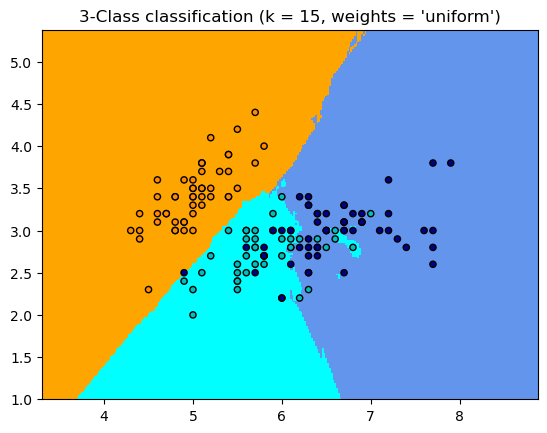

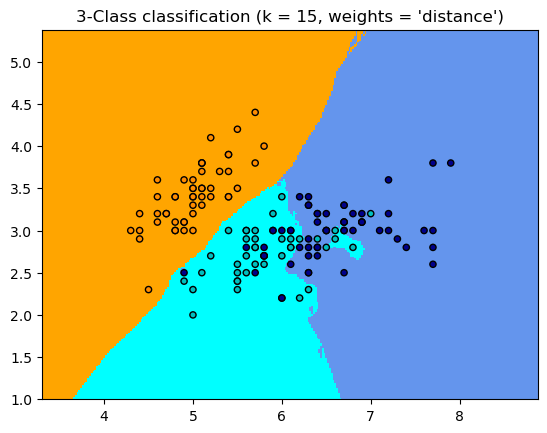

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]

y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Reference

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry">Gareth, James, Daniela, Witten, Trevor, Hastie, &#38; Robert, Tibshirani. (2015). <i>An Introduction to Statistical learning</i> (1st edition). Springer.</div>

</div>
<!-- BIBLIOGRAPHY END -->